# Plotting maps example

This notebook gives a minimal example of using acs_plotting_maps.py

Code is available publically here [https://github.com/AusClimateService/plotting_maps/blob/main/acs_plotting_maps.py]

The README [https://github.com/AusClimateService/plotting_maps/tree/main] gives cloning instructions and virtual environment requirements to ensure it runs smoothly.

For example, in your working directory (eg navigate to your home, scratch, or user directory in a project using cd), clone this repository to access this code 
```
$ git clone https://github.com/AusClimateService/plotting_maps.git plotting_maps
```

This code is designed to work with hh5 analysis3-24.04 virtual environment. Eg:
```
$ module use /g/data/hh5/public/modules
$ module load conda_concept/analysis3-24.04
```


# Step 1 - access plotting package
Navigate to the directory that you have cloned the plotting_maps repo to. eg
```
cd ~/plotting_maps
```

In [1]:
cd /g/data/mn51/users/gt3409/plotting_maps/

/g/data/mn51/users/gt3409/plotting_maps


Then import the plotting function ```plot_acs_hazard``` and helpful dictionaries ```regions_dict, cmap_dict, tick_dict```

In [2]:
# import ACS plotting maps and Xarray.
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm, LinearSegmentedColormap
from acs_plotting_maps import plot_acs_hazard, plot_acs_hazard_3pp, regions_dict, cmap_dict, tick_dict
import xarray as xr

CPU times: user 3min 55s, sys: 2.58 s, total: 3min 57s
Wall time: 4min 1s


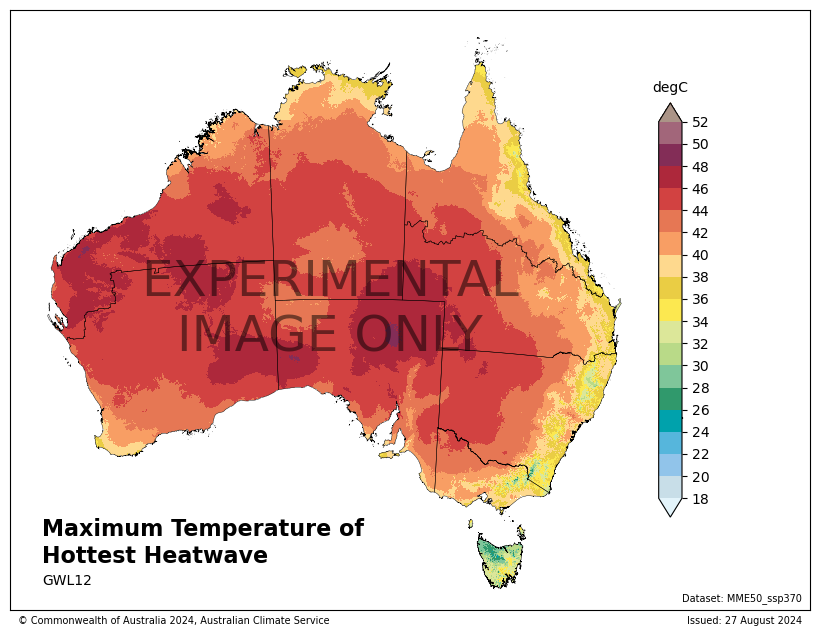

In [3]:
%%time
filename = "/g/data/ia39/ncra/heat/data/HWAtx/bias-corrected/ensemble/GWL-average/HWAtx_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL12.nc"
ds = xr.open_dataset(filename)
ds = ds.drop_vars("quantile")
cmap_dict.update({'tasmax' : ListedColormap(colors=['#E3F4FB','#C8DEE8','#91C4EA','#56B6DC','#00A2AC','#30996C','#7FC69A','#B9DA88','#DCE799','#FCE850','#EACD44','#FED98E','#F89E64','#E67754','#D24241','#AD283B','#832D57','#A2667A','#AB9487'],name='tasmax'),})
var = "HWAtx"
regions = regions_dict["ncra_regions"].to_crs(crs = "GDA2020")
# stippling_mask = ds[var]>42

fig, ax = plot_acs_hazard(data = ds[var],
                # stippling=stippling_mask,
                regions = regions,
                title = "Maximum Temperature of \nHottest Heatwave",
                date_range = "GWL12",
                figsize=(8, 6),
                cmap = cmap_dict["tasmax"],
                ticks = np.arange(18,53,2),
                cbar_label = "degC",
                cbar_extend = "both",                
                dataset_name = "MME50_ssp370",
                outfile = "figures/out.png",
               watermark_color="k");

CPU times: user 2min 8s, sys: 408 ms, total: 2min 8s
Wall time: 2min 9s


(<Figure size 1000x400 with 5 Axes>, <Axes: >)

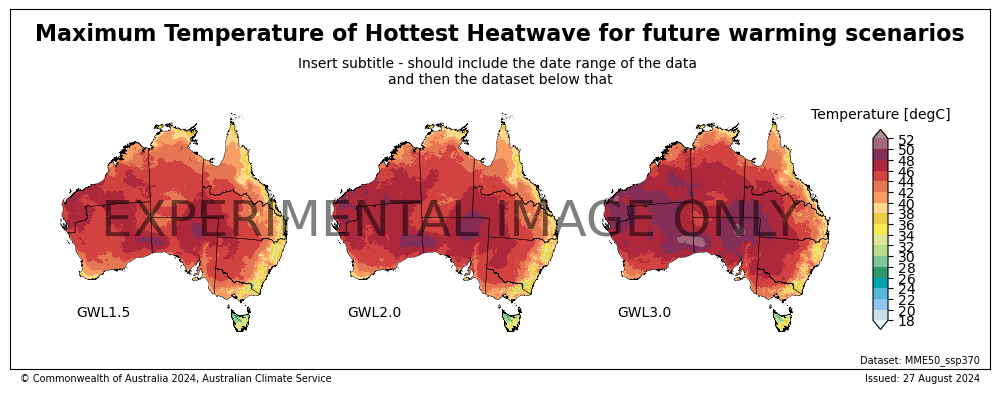

In [4]:
%%time
var = "HWAtx"

ds_gwl12 =xr.open_dataset("/g/data/ia39/ncra/heat/data/HWAtx/bias-corrected/ensemble/GWL-average/HWAtx_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL12.nc")
ds_gwl15 = xr.open_dataset("/g/data/ia39/ncra/heat/data/HWAtx/bias-corrected/ensemble/GWL-average/HWAtx_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL15.nc")
ds_gwl20 = xr.open_dataset("/g/data/ia39/ncra/heat/data/HWAtx/bias-corrected/ensemble/GWL-average/HWAtx_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL20.nc")
ds_gwl30 = xr.open_dataset("/g/data/ia39/ncra/heat/data/HWAtx/bias-corrected/ensemble/GWL-average/HWAtx_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL30.nc")

plot_acs_hazard_3pp(ds_gwl15 = ds_gwl15[var], 
                    ds_gwl20 = ds_gwl20[var],
                    ds_gwl30 = ds_gwl30[var],
                    regions = regions_dict['ncra_regions'],
                    cbar_label=f"Temperature [degC]",
                    title=f"Maximum Temperature of Hottest Heatwave for future warming scenarios", 
                    date_range = "Insert subtitle - should include the date range of the data \nand then the dataset below that", 
                    # baseline = "GWL1.2", 
                    dataset_name= "MME50_ssp370",
                    issued_date=None,
                    watermark="EXPERIMENTAL IMAGE ONLY", 
                    watermark_color="k",
                    cmap = cmap_dict["tasmax"],
                    ticks = np.arange(18,53,2),)

CPU times: user 2min 5s, sys: 306 ms, total: 2min 6s
Wall time: 2min 6s


(<Figure size 1000x400 with 5 Axes>, <Axes: >)

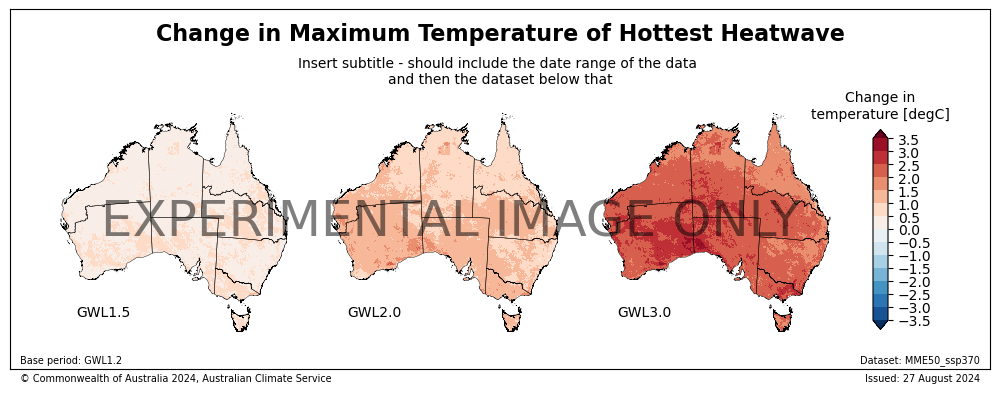

In [5]:
%%time
var = "HWAtx"

# ds_gwl12 =xr.open_dataset("/g/data/ia39/ncra/heat/data/HWAtx/bias-corrected/ensemble/GWL-average/HWAtx_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL12.nc")
# ds_gwl15 = xr.open_dataset("/g/data/ia39/ncra/heat/data/HWAtx/bias-corrected/ensemble/GWL-average/HWAtx_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL15.nc")
# ds_gwl20 = xr.open_dataset("/g/data/ia39/ncra/heat/data/HWAtx/bias-corrected/ensemble/GWL-average/HWAtx_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL20.nc")
# ds_gwl30 = xr.open_dataset("/g/data/ia39/ncra/heat/data/HWAtx/bias-corrected/ensemble/GWL-average/HWAtx_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL30.nc")

plot_acs_hazard_3pp(ds_gwl15 = ds_gwl15[var] -ds_gwl12[var], 
                    ds_gwl20 = ds_gwl20[var] -ds_gwl12[var],
                    ds_gwl30 = ds_gwl30[var] -ds_gwl12[var],
                    regions = regions_dict['ncra_regions'],
                    cbar_label=f"Change in\ntemperature [degC]",
                    title=f"Change in Maximum Temperature of Hottest Heatwave", 
                    date_range = "Insert subtitle - should include the date range of the data \nand then the dataset below that", 
                    baseline = "GWL1.2", 
                    dataset_name= "MME50_ssp370",
                    issued_date=None,
                    watermark="EXPERIMENTAL IMAGE ONLY", 
                    watermark_color="k",
                    cmap = cmap_dict["tas_anom"],
                    ticks = np.arange(-3.5,3.51,0.5),
)

## Step 4: Calculate NCRA region statistics

In [6]:
# import needed packages
from acs_area_statistics import acs_regional_stats, get_regions
import xarray as xr
import numpy as np

mask_ncra = xr.open_dataset("/g/data/ia39/aus-ref-clim-data-nci/shapefiles/masks/AGCD-05i/mask-3D-frac-approx_ncra-regions.nc")
mask_aus = xr.open_dataset("/g/data/ia39/aus-ref-clim-data-nci/shapefiles/masks/AGCD-05i/mask-3D-frac-approx_australia.nc")

mask = xr.concat([mask_ncra,mask_aus], dim="region")
mask["region"] = np.arange(0, len(mask["region"]))
mask

regions = get_regions(["ncra_regions", "australia"])


In [7]:
# calculate the stats using the acs_region_fractional_stats function
# Find the min, mean, max value for each region
how = ["mean", "min", "max"]
outfile = filename.split('/')[-1].replace(".nc", f"_summary-{'-'.join(how)}_ncra-regions.csv")
da_summary = acs_regional_stats(ds=ds, 
                                mask = mask["mask"], 
                                dims=("lat", "lon"),
                                how=how,
                                outfile = outfile)
da_summary


<xarray.Dataset> Size: 2kB
Dimensions:     (region: 10)
Coordinates:
  * region      (region) int64 80B 0 1 2 3 4 5 6 7 8 9
    abbrevs     (region) <U8 320B 'WANorth' 'WASouth' 'NSW' ... 'QLDSouth' 'AUS'
    names       (region) <U48 2kB 'Western Australia North' ... 'Australia'
Data variables:
    HWAtx_mean  (region) float64 80B 45.06 44.83 42.02 ... 40.94 43.39 43.58
    HWAtx_min   (region) float32 40B 37.44 34.88 25.51 ... 31.03 31.27 23.35
    HWAtx_max   (region) float32 40B 48.87 48.01 46.21 ... 45.41 47.3 48.87

# Access the docstring for more info

In [8]:
plot_acs_hazard?

Signature:
plot_acs_hazard(
    name='ncra_regions',
    regions=                                         regionname  regionid short_name  \
0                           Western Australia North         1    WANorth   
1                           Western Australia South         2    WASouth   
2  New South Wales and Australian Capital Territory         3        NSW   
3                                          Victoria         4        VIC   
4                                   South Australia         5         SA   
5                                          Tasmania         6        TAS   
6                                Northern Territory         7         NT   
7                                  Queensland North         8   QLDNorth   
8                                  Queensland South         9   QLDSouth   

       label                                           geometry  
0   WA North  MULTIPOLYGON (((12653368.028 -3081225.048, 126...  
1   WA South  MULTIPOLYGON (((13121161.172

In [9]:
acs_regional_stats?

Signature:
acs_regional_stats(
    ds=None,
    infile=None,
    var=None,
    mask=None,
    regions=<regionmask.Regions 'ncra_regions-australia'>
overlap:  True

Regions:
0  WANorth                          Western Australia North
1  WASouth                          Western Australia South
2      NSW New South Wales and Australian Capital Territory
3      VIC                                         Victoria
4       SA                                  South Australia
5      TAS                                         Tasmania
6       NT                               Northern Territory
7 QLDNorth                                 Queensland North
8 QLDSouth                                 Queensland South
9      AUS                                        Australia

[10 regions],
    start=None,
    end=None,
    dims=None,
    how=None,
    outfile=None,
    select_abbr=None,
    select_name=None,
    overlap_threshold=None,
    bins=None,
    bin_labels=None,
)
Docstring:
This function 